In [78]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as mpl
import matplotlib.cm as cm



In [79]:
# read files 
prefix = "/Users/leo/C++/MD_Inputs/ctest"
with open(prefix +'_x_initial.txt', 'r') as file: 
    x = [float(line.rstrip()) for line in file]
with open(prefix +'_y_initial.txt', 'r') as file: 
    y = [float(line.rstrip()) for line in file]
with open(prefix +'_vx_initial.txt', 'r') as file: 
    vx = [float(line.rstrip()) for line in file]
with open(prefix +'_vy_initial.txt', 'r') as file: 
    vy = [float(line.rstrip()) for line in file]

N = 32
rho_star = 0.05
x0 = np.array(x[0:N])
x00 = np.array(x[N:2*N])
x000 = np.array(x[2*N:3*N])
y0 = np.array(y[0:N])
y00 = np.array(y[N:2*N])
y000 = np.array(y[2*N:3*N])
vx0 = np.array(vx[0:N])
vx00 = np.array(vx[N:2*N])
vx000 = np.array(vx[2*N:3*N])
vy0 = np.array(vy[0:N])
vy00 = np.array(vy[N:2*N])
vy000 = np.array(vy[2*N:3*N])

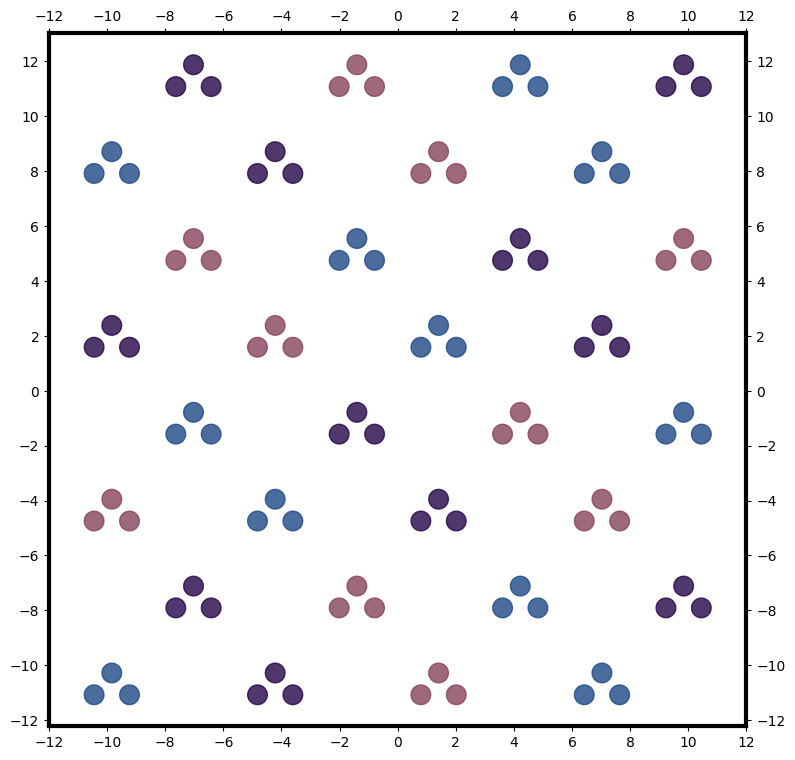

In [75]:
L  =(np.sqrt(N/(rho_star)))
plt.figure(figsize = (9,9))

colors = ['#1E4886', '#240547', '#86425D']

# colors = ['#001476', '#760072', '#40699E', '#16034D']   '#006276'

alph = 0.8
ss = 200

### ss = 285 for N = 200

indices = [colors[i%3] for i in range(N)]
plt.scatter(x0, y0, color = indices, s = ss, alpha = alph)
plt.scatter(x00, y00, color = indices, s = ss, alpha = alph)
plt.scatter(x000, y000, color = indices, s = ss, alpha = alph)


# plt.xlim(-L/2, L/2)
# plt.ylim(-L/2,  L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4x/bmt6t_kn6kj7kj6_jg6724p00000gn/T/ipykernel_9771/2639016331.py:19: SyntaxWarning: invalid escape sequence '\s'
  plt.colorbar(q, label= '$|v|$ [$\sqrt{\epsilon/m}$]')


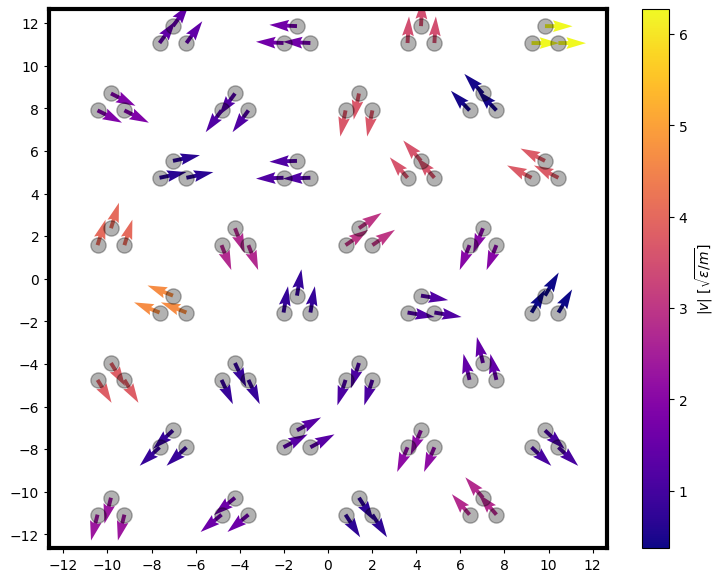

In [76]:
## Plot initial velocities

plt.figure(figsize = (9,7))
colors = ['k', 'r', 'b', 'g']
indices = [colors[i%4] for i in range(N)]

magnitude = np.sqrt(vx0**2 + vy0**2)
u = vx0/magnitude
v = vy0/magnitude

sss  =120## size in this plot

### sss = 170 for N = 200

q= plt.quiver(x0, y0, u, v, magnitude, angles = "xy", scale_units = "xy", scale =0.8, cmap = 'plasma', width = 0.007)
q= plt.quiver(x00, y00, u, v, magnitude, angles = "xy", scale_units = "xy", scale =0.8, cmap = 'plasma', width = 0.007)
q= plt.quiver(x000, y000, u, v, magnitude, angles = "xy", scale_units = "xy", scale =0.8, cmap = 'plasma', width = 0.007)

plt.colorbar(q, label= '$|v|$ [$\sqrt{\epsilon/m}$]')
plt.scatter(x0, y0, color = 'k', s= sss, alpha = 0.3)
plt.scatter(x00, y00, color = 'k', s= sss, alpha = 0.3)
plt.scatter(x000, y000, color = 'k', s= sss, alpha = 0.3)

plt.xlim(-L/2, L/2)
plt.ylim(-L/2,  L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

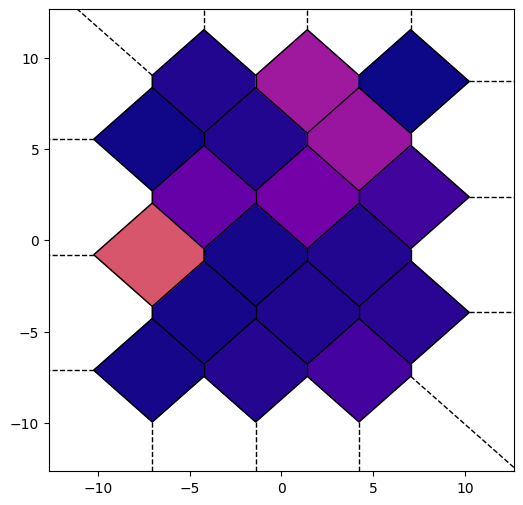

In [77]:
### Voronoi

speed = np.array(vx0**2 + vy0**2)

points = np.vstack((x0, y0)).T
vor = Voronoi(points)
vor = Voronoi(points)

# find min/max values for normalization
minima = min(speed)
maxima = max(speed)

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.plasma)
fig = voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1)
fig.set_size_inches((6,6))
for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r]))
plt.xlim(-L/2, L/2)
plt.ylim(-L/2,  L/2)
plt.show()
